<h1 style="text-align:center;">Predictive Analysis and Visulization of Coronavirus Scenario in Bangladesh</h1><br>

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import folium

In [2]:
#linking plotly offline with jupyter notebook
pyo.init_notebook_mode(connected = True)
cf.go_offline()

In [89]:
#dataset of Coronavirus cases in Bangladesh
df = pd.read_csv("district_wise_cases_bangladesh.csv")
#df

,District,Cases
0,Dhaka,636
1,Gazipur,98
2,Kishoreganj,33
3,Madaripur,23
4,Manikganj,5
5,Narayanganj,255
6,Munshigonj,26
7,Narsingdi,64
8,Rajbari,7
9,Faridpur,2


<h3 style="text-align:center;">District-wise Coronavirus Cases</h3>

In [93]:
df.style.background_gradient(cmap="Reds").hide_index()

District,Cases
Dhaka,636
Gazipur,98
Kishoreganj,33
Madaripur,23
Manikganj,5
Narayanganj,255
Munshigonj,26
Narsingdi,64
Rajbari,7
Faridpur,2


In [59]:
total_cases = df["Cases"].sum()
print("Total Cases Found in Bangladesh until 16th April: ",total_cases)

Total Cases Found in Bangladesh until 16th April:  1356


In [6]:
#uncomment the lines below to convert all the interactive graphs to image
#import plotly.io as pio
#pio.renderers.default = "svg"

<br><h3>Bar Chart showing District-wise Coronavirus Cases</h3>

In [63]:
fig1 = go.Figure()

fig1.add_trace(go.Bar(x = df['District'], y = df['Cases'], marker = dict(color = df['Cases'], coloraxis = "coloraxis")))
fig1.update_layout(title = "Bar Chart showing District-wise Coronavirus Cases", xaxis_title = "Date", yaxis_title = "Cases", height = 600, width = 800)

fig1.show()

In [90]:
#dataset of districts' location in Bangladesh
dis_loc = pd.read_csv("district_coordinates_bangladesh.csv")
#dis_loc

,District,Latitude,Longitude
0,Dhaka,23.8103,90.4125
1,Gazipur,23.9999,90.4203
2,Jamalpur,25.0831,89.7853
3,Kishoreganj,24.4260,90.9821
4,Madaripur,23.2393,90.1870
5,Manikganj,23.8617,90.0003
6,Narayanganj,23.6238,90.5000
7,Narsingdi,24.1344,90.7860
8,Rajbari,23.7639,89.6467
9,Tangail,24.3917,89.9948


In [91]:
#merging previous two dataset
df_updated = pd.merge(dis_loc, df, on = "District")
#df_updated

,District,Latitude,Longitude,Cases
0,Dhaka,23.8103,90.4125,636
1,Gazipur,23.9999,90.4203,98
2,Jamalpur,25.0831,89.7853,12
3,Kishoreganj,24.4260,90.9821,33
4,Madaripur,23.2393,90.1870,23
5,Manikganj,23.8617,90.0003,5
6,Narayanganj,23.6238,90.5000,255
7,Narsingdi,24.1344,90.7860,64
8,Rajbari,23.7639,89.6467,7
9,Tangail,24.3917,89.9948,9


<br><h3 style="text-align:center;">Visualization of Coronavirus Cases around the Country</h3>

In [92]:
#visualizing the data in map
map = folium.Map(location = [23.8,90], zoom_start = 7)
folium.TileLayer('stamenterrain').add_to(map)


for lat, long, value, name in zip(df_updated["Latitude"], df_updated["Longitude"], df_updated["Cases"], df_updated["District"]):
    folium.CircleMarker([lat, long], radius = value*0.15, color = 'crimson', fill = True, fill_color = 'crimson', popup = ("<b>District</b>: " + str(name) +"<br>""<b>Cases</b>: " + str(value)+ "<br>"), fill_opacity=0.3).add_to(map)

map


In [11]:
#dataset of global cases
df_global_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", error_bad_lines = False, warn_bad_lines = True)
df_global_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv", error_bad_lines = False, warn_bad_lines = True)
df_global_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv", error_bad_lines = False, warn_bad_lines = True)

In [12]:
#data preprocessing
df_global_cases.drop('Province/State', axis = 1, inplace = True)
df_global_cases.drop('Lat', axis = 1, inplace = True)
df_global_cases.drop('Long', axis = 1, inplace = True)
#df_global_cases.head()

In [13]:
df_global_deaths.drop('Province/State', axis = 1, inplace = True)
df_global_deaths.drop('Lat', axis = 1, inplace = True)
df_global_deaths.drop('Long', axis = 1, inplace = True)
#df_global_deaths.head()

In [14]:
df_global_recovered.drop('Province/State', axis = 1, inplace = True)
df_global_recovered.drop('Lat', axis = 1, inplace = True)
df_global_recovered.drop('Long', axis = 1, inplace = True)
#df_global_recovered.head()

In [15]:
#function to melt the dataframe according to Country/Region
def melt_data(data_frame, case_type):
    melted_df = data_frame.melt(id_vars = ["Country/Region"])
    melted_df.rename(columns = {"variable" : "Date", "value" : case_type}, inplace = True)
    return melted_df

In [16]:
melted_df_global_cases = melt_data(df_global_cases, "Cases")
melted_df_global_cases = melted_df_global_cases.drop_duplicates()
#melted_df_global_cases.head()

In [17]:
melted_df_global_deaths = melt_data(df_global_deaths, "Deaths")
melted_df_global_deaths = melted_df_global_deaths.drop_duplicates()
#melted_df_global_deaths.head()

In [18]:
melted_df_global_recovered = melt_data(df_global_recovered, "Recovered")
melted_df_global_recovered = melted_df_global_recovered.drop_duplicates()
#melted_df_global_recovered.head()

In [19]:
#merging previous dataframes to a combined one
df_global_temp = pd.merge(melted_df_global_cases, melted_df_global_deaths, on = ['Country/Region', 'Date']) 
df_global_combined = pd.merge(df_global_temp, melted_df_global_recovered, on = ['Country/Region', 'Date'])
#df_global_combined.head()

In [20]:
#filtering data related to Bangladesh
df_bangladesh = df_global_combined.loc[df_global_combined["Country/Region"] == "Bangladesh"]
df_bangladesh['Date'] = pd.to_datetime(df_bangladesh['Date'])

In [21]:
bd_cases = df_bangladesh.groupby('Date').sum()['Cases'].reset_index()
bd_deaths = df_bangladesh.groupby('Date').sum()['Deaths'].reset_index()
bd_recovered = df_bangladesh.groupby('Date').sum()['Recovered'].reset_index()

<br><h3>Overall Condition due to Coronavirus in Bangladesh</h3>

In [22]:
#visualizing overall condition due to the coronavirus in Bangladesh
fig2 = go.Figure()

fig2.add_trace(go.Scatter(x = bd_cases['Date'], y = bd_cases['Cases'], mode = 'lines+markers', name = 'Cases', line = dict(color = 'yellow', width = 1)))
fig2.add_trace(go.Scatter(x = bd_deaths['Date'], y = bd_deaths['Deaths'], mode = 'lines+markers', name = 'Deaths', line = dict(color = 'red', width = 1)))
fig2.add_trace(go.Scatter(x = bd_recovered['Date'], y = bd_recovered['Recovered'], mode = 'lines+markers', name = 'Recovered', line = dict(color = 'green', width = 1)))

fig2.update_layout(title = "Analysis of Cases, Deaths, and Recoveries in Bangladesh", xaxis_title = "Date", yaxis_title = "Values", height = 600, width = 800)
   
fig2.show()

In [23]:
#filtering data related to Germany
df_germany = df_global_combined.loc[df_global_combined["Country/Region"] == "Germany"]
df_germany['Date'] = pd.to_datetime(df_germany['Date'])

In [24]:
ger_cases = df_germany.groupby('Date').sum()['Cases'].reset_index()
ger_deaths = df_germany.groupby('Date').sum()['Deaths'].reset_index()
ger_recovered = df_germany.groupby('Date').sum()['Recovered'].reset_index()

In [25]:
#filtering data related to India
df_india = df_global_combined.loc[df_global_combined["Country/Region"] == "India"]
df_india['Date'] = pd.to_datetime(df_india['Date'])

In [26]:
india_cases = df_india.groupby('Date').sum()['Cases'].reset_index()
india_deaths = df_india.groupby('Date').sum()['Deaths'].reset_index()
india_recovered = df_india.groupby('Date').sum()['Recovered'].reset_index()

In [27]:
#filtering data related to Norway
df_norway = df_global_combined.loc[df_global_combined["Country/Region"] == "Norway"]
df_norway['Date'] = pd.to_datetime(df_norway['Date'])

In [28]:
norway_cases = df_norway.groupby('Date').sum()['Cases'].reset_index()
norway_deaths = df_norway.groupby('Date').sum()['Deaths'].reset_index()
norway_recovered = df_norway.groupby('Date').sum()['Recovered'].reset_index()

In [29]:
from plotly.subplots import make_subplots

<br><h3>Overview of Coronavirus Between Bangladesh and Other Three Countries</h3>

In [30]:
#subplotting the graphs of different countries
fig3 = make_subplots(rows = 2, cols = 2, specs = [[{"secondary_y":True}, {"secondary_y":True}], [{"secondary_y":True}, {"secondary_y":True}]], subplot_titles=("Bangladesh", "Germany", "India", "Norway"))

fig3.add_trace(go.Scatter(x = bd_cases['Date'], y = bd_cases['Cases'], name = "Cases", line = dict(color = 'yellow', width = 1), marker = dict(color = bd_cases['Cases'], coloraxis = "coloraxis")), 1, 1)
fig3.add_trace(go.Scatter(x = bd_deaths['Date'], y = bd_deaths['Deaths'], name = "Deaths", line = dict(color = 'red', width = 1), marker = dict(color = bd_deaths['Deaths'], coloraxis = "coloraxis")), 1, 1)
fig3.add_trace(go.Scatter(x = bd_recovered['Date'], y = bd_recovered['Recovered'], name = "Recovered", line = dict(color = 'green', width = 1), marker = dict(color = bd_recovered['Recovered'], coloraxis = "coloraxis")), 1, 1)

fig3.add_trace(go.Scatter(x = ger_cases['Date'], y = ger_cases['Cases'], name = "Cases", showlegend = False, line = dict(color = 'yellow', width = 1), marker = dict(color = ger_cases['Cases'], coloraxis = "coloraxis")), 1, 2)
fig3.add_trace(go.Scatter(x = ger_deaths['Date'], y = ger_deaths['Deaths'], name = "Deaths", showlegend = False, line = dict(color = 'red', width = 1), marker = dict(color = ger_deaths['Deaths'], coloraxis = "coloraxis")), 1, 2)
fig3.add_trace(go.Scatter(x = ger_recovered['Date'], y = ger_recovered['Recovered'], name = "Recovered", showlegend = False, line = dict(color = 'green', width = 1), marker = dict(color = ger_recovered['Recovered'], coloraxis = "coloraxis")), 1, 2)

fig3.add_trace(go.Scatter(x = india_cases['Date'], y = india_cases['Cases'], name = "Cases", showlegend = False, line = dict(color = 'yellow', width = 1), marker = dict(color = india_cases['Cases'], coloraxis = "coloraxis")), 2, 1)
fig3.add_trace(go.Scatter(x = india_deaths['Date'], y = india_deaths['Deaths'], name = "Deaths", showlegend = False, line = dict(color = 'red', width = 1), marker = dict(color = india_deaths['Deaths'], coloraxis = "coloraxis")), 2, 1)
fig3.add_trace(go.Scatter(x = india_recovered['Date'], y = india_recovered['Recovered'], name = "Recovered", showlegend = False, line = dict(color = 'green', width = 1), marker = dict(color = india_recovered['Recovered'], coloraxis = "coloraxis")), 2, 1)

fig3.add_trace(go.Scatter(x = norway_cases['Date'], y = norway_cases['Cases'], name = "Cases", showlegend = False, line = dict(color = 'yellow', width = 1), marker = dict(color = norway_cases['Cases'], coloraxis = "coloraxis")), 2, 2)
fig3.add_trace(go.Scatter(x = norway_deaths['Date'], y = norway_deaths['Deaths'], name = "Deaths", showlegend = False, line = dict(color = 'red', width = 1), marker = dict(color = norway_deaths['Deaths'], coloraxis = "coloraxis")), 2, 2)
fig3.add_trace(go.Scatter(x = norway_recovered['Date'], y = norway_recovered['Recovered'], name = "Recovered", showlegend = False, line = dict(color = 'green', width = 1), marker = dict(color = norway_recovered['Recovered'], coloraxis = "coloraxis")), 2, 2)

fig3.update_layout(coloraxis = dict(colorscale = 'Bluered_r'), showlegend = True, title_text = "Comparison Between Bangladesh and Other Three Countries", height = 600, width = 800)

fig3.update_yaxes(title_text = "Values", row = 1, col = 1)
fig3.update_yaxes(title_text = "Values", row = 1, col = 2)
fig3.update_yaxes(title_text = "Values", row = 2, col = 1)
fig3.update_yaxes(title_text = "Values", row = 2, col = 2)

fig3.show()

In [31]:
#predictive analysis of cases, deaths, and recoveries from Coronavirus in Bangladesh

In [32]:
#data preprocessing
bd_overall_temp = pd.merge(bd_cases, bd_deaths, on = 'Date')
bd_overall = pd.merge(bd_overall_temp, bd_recovered, on = 'Date')
#bd_overall.head()

In [33]:
bd_overall_cases = bd_overall[['Date', 'Cases']]
bd_overall_deaths = bd_overall[['Date', 'Deaths']]
bd_overall_recovered = bd_overall[['Date', 'Recovered']]

In [34]:
from fbprophet import Prophet

In [35]:
#creating model for cases
cases = bd_overall_cases.rename(columns = {'Date' : 'ds', 'Cases' : 'y'})
model_cases = Prophet(interval_width = 0.95)
model_cases.fit(cases)
predict_cases = model_cases.make_future_dataframe(periods = 30)
predict_cases = model_cases.predict(predict_cases)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<br><h3>Prediction of Coronavirus Cases in Bangladesh for next 30 Days</h3>

Text(0.5, 1.0, 'Coronavirus Cases in Bangladesh')

<Figure size 432x288 with 0 Axes>

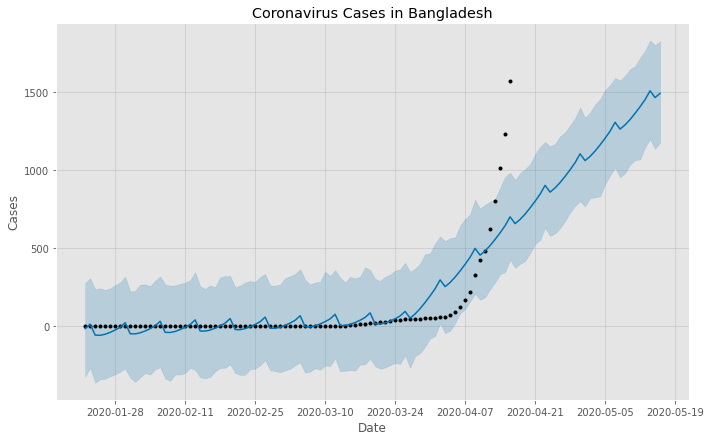

In [36]:
#ploting the predicted Coronavirus cases for next 30 days
plt.figure()
model_cases.plot(predict_cases, xlabel = 'Date', ylabel = 'Cases')
plt.title('Coronavirus Cases in Bangladesh')

In [37]:
#creating model for deaths
deaths = bd_overall_deaths.rename(columns = {'Date' : 'ds', 'Deaths' : 'y'})
model_deaths = Prophet(interval_width = 0.95)
model_deaths.fit(deaths)
predict_deaths = model_deaths.make_future_dataframe(periods = 30)
predict_deaths = model_deaths.predict(predict_deaths)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<br><h3>Prediction of Coronavirus Deaths in Bangladesh for next 30 Days</h3>

Text(0.5, 1.0, 'Deaths from Coronavirus in Bangladesh')

<Figure size 432x288 with 0 Axes>

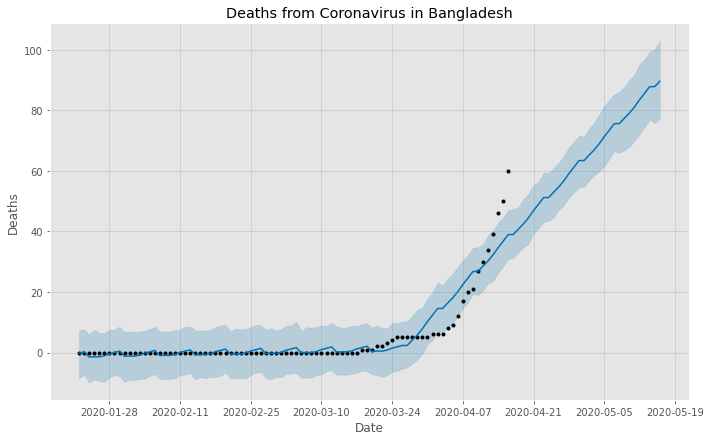

In [38]:
#ploting the predicted deaths from Coronavirus for next 30 days
plt.figure()
model_deaths.plot(predict_deaths, xlabel = 'Date', ylabel = 'Deaths')
plt.title('Deaths from Coronavirus in Bangladesh')

In [39]:
#creating model for recovered
recovered = bd_overall_recovered.rename(columns = {'Date' : 'ds', 'Recovered' : 'y'})
model_recovered = Prophet(interval_width = 0.95)
model_recovered.fit(recovered)
predict_recovered = model_recovered.make_future_dataframe(periods = 30)
predict_recovered = model_recovered.predict(predict_recovered)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<br><h3>Prediction of Coronavirus Recoveries in Bangladesh for next 30 Days</h3>

Text(0.5, 1.0, 'Recovered from Coronavirus in Bangladesh')

<Figure size 432x288 with 0 Axes>

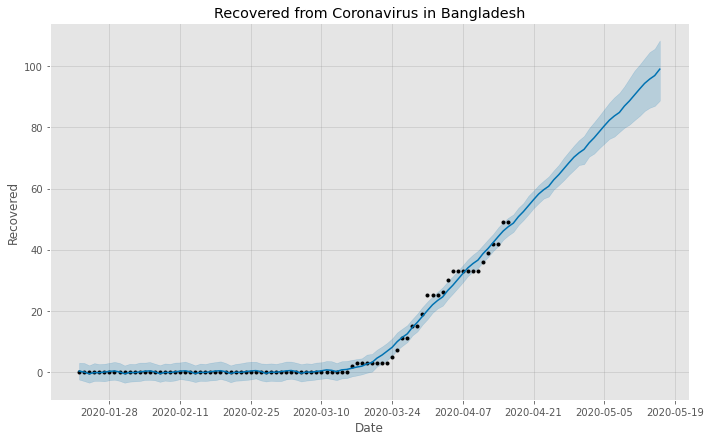

In [40]:
#ploting the predicted recoveries from Coronavirus for next 30 days
plt.figure()
model_recovered.plot(predict_recovered, xlabel = 'Date', ylabel = 'Recovered')
plt.title('Recovered from Coronavirus in Bangladesh')

In [51]:
#combining all the predicted results
cases_columns = ['cases_%s' % column for column in predict_cases.columns]
deaths_columns = ['deaths_%s' % column for column in predict_deaths.columns]
recovered_columns = ['recovered_%s' % column for column in predict_recovered.columns]

merge_predict_cases = predict_cases.copy()
merge_predict_deaths = predict_deaths.copy()
merge_predict_recovered = predict_recovered.copy()

merge_predict_cases.columns = cases_columns
merge_predict_deaths.columns = deaths_columns
merge_predict_recovered.columns = recovered_columns

prediction_temp = pd.merge(merge_predict_cases, merge_predict_deaths, how = 'inner', left_on = 'cases_ds', right_on = 'deaths_ds')
prediction = pd.merge(prediction_temp, merge_predict_recovered, how = 'inner', left_on = 'deaths_ds', right_on = 'recovered_ds')

prediction = prediction.rename(columns = {'cases_ds': 'Date'}).drop('deaths_ds', axis = 1)
prediction = prediction.drop('recovered_ds', axis = 1)
#prediction.head()

<br><h3>Trend of Coronavirus Conditions in Bangladesh with Prediction for next 30 Days</h3>

In [48]:
#plotting the trends of cases, deaths, and recoveries
fig4 = go.Figure()

fig4.add_trace(go.Scatter(x = prediction['Date'], y = prediction['cases_trend'], mode = 'lines', name = 'Cases', line = dict(color = 'yellow', width = 1)))
fig4.add_trace(go.Scatter(x = prediction['Date'], y = prediction['deaths_trend'], mode = 'lines', name = 'Deaths', line = dict(color = 'red', width = 1)))
fig4.add_trace(go.Scatter(x = prediction['Date'], y = prediction['recovered_trend'], mode = 'lines', name = 'Recovered', line = dict(color = 'green', width = 1)))

fig4.update_layout(title = "Trend between Cases, Deaths, and Recoveries in Bangladesh", xaxis_title = "Date", yaxis_title = "Values", height = 600, width = 800)
   
fig4.show()

<br><h3>Estimated graph of Coronavirus Conditions in Bangladesh with Prediction for next 30 Days</h3>

In [43]:
#ploting estimated values of Cases, Deaths, and Recovered
fig5 = go.Figure()

fig5.add_trace(go.Scatter(x = prediction['Date'], y = prediction['cases_yhat'], mode = 'lines', name = 'Cases', line = dict(color = 'yellow', width = 1)))
fig5.add_trace(go.Scatter(x = prediction['Date'], y = prediction['deaths_yhat'], mode = 'lines', name = 'Deaths', line = dict(color = 'red', width = 1)))
fig5.add_trace(go.Scatter(x = prediction['Date'], y = prediction['recovered_yhat'], mode = 'lines', name = 'Recovered', line = dict(color = 'green', width = 1)))

fig5.update_layout(title = "Estimation between Cases, Deaths, and Recovered", xaxis_title = "Date", yaxis_title = "Values", height = 600, width = 800)
   
fig5.show()

<br><h3>Weekly Analysis of Coronavirus Cases in Bangladesh with Prediction for next 30 Days</h3>

In [44]:
#ploting weekly analysis of cases, deaths, and recoveries from Coronavirus in Bangladesh

<Figure size 432x288 with 0 Axes>

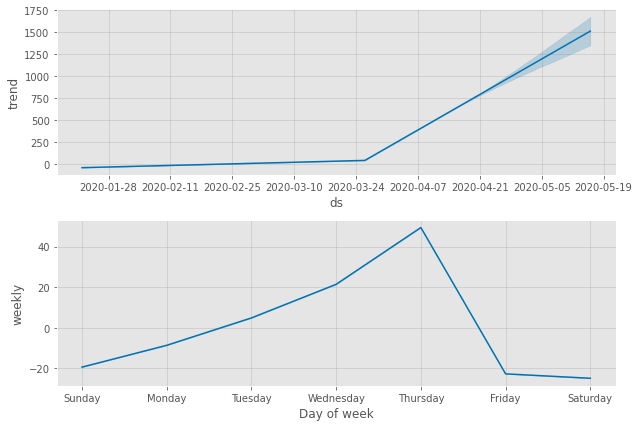

In [45]:
plt.figure()
model_cases.plot_components(predict_cases)
plt.show()

<br><h3>Weekly Analysis of Coronavirus Deaths in Bangladesh with Prediction for next 30 Days</h3>

<Figure size 432x288 with 0 Axes>

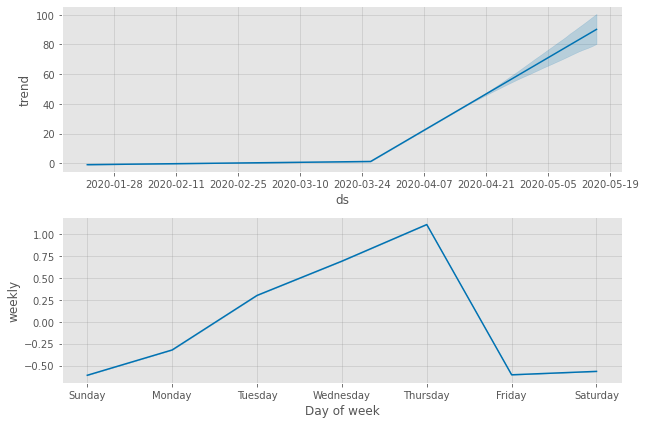

In [46]:
plt.figure()
model_deaths.plot_components(predict_deaths)
plt.show()

<br><h3>Weekly Analysis of Coronavirus Recoveries in Bangladesh with Prediction for next 30 Days</h3>

<Figure size 432x288 with 0 Axes>

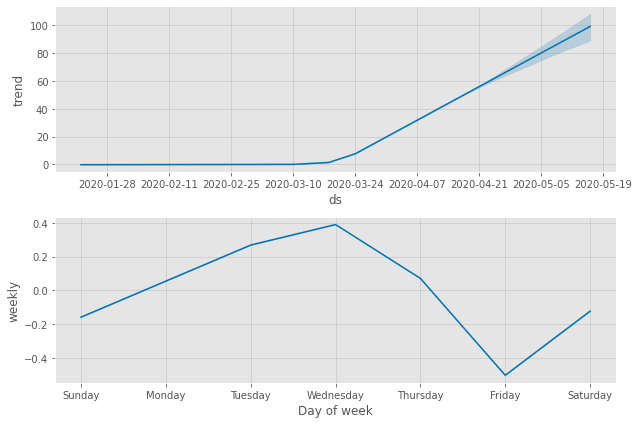

In [47]:
plt.figure()
model_recovered.plot_components(predict_recovered)
plt.show()

<br>
<h5 style="text-align:center;">Data Collected from IEDCR and JHU CSSE.</h5>
<h6 style="text-align:center;">This site is developed and deployed using Jupyter, Voila, and Heroku.</h6>